# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor

   


(100, 2)


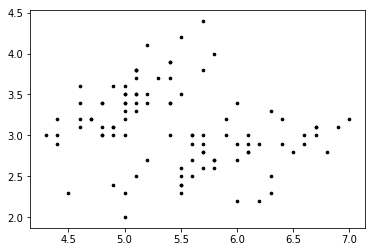

In [1]:
# Load dataset and plot it

%matplotlib inline
import math
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

df = pd.read_csv('simple_iris_dataset.csv')

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
print(X.shape)

In [2]:
# Initialize - take 2 random samples from data set
k = 2
N = len(X)
ctr1 = X[(np.random.randint(0,N)),:]
ctr2 = X[(np.random.randint(0,N)),:]
C = np.array(list(zip(ctr1, ctr2)), dtype=np.float32)  # 2x2

print(C.shape)
print()

#print("sum of centers")
#print(C.sum(axis= 0))
#print()

# Stores the value of old centroids
C_old = np.zeros(C.shape)

cluster1 = []
cluster2 = []

# Cluster indices
clusters = np.zeros(len(X))

MAX_ITR = 100
# Loop till convergence, i.e., centroids do not change anymore
# or until raching MAX_ITR

for itr in range(0,MAX_ITR):
    
    #print()
    #print("iteration ", itr)
    #print("Centers:")
    #print(C)
    #print("distance to pt 0: ", math.sqrt((C[0][0] - X[i][0]) ** 2 + (C[0][1] - X[i][1]) ** 2))
    #print("distance to pt 1: ", math.sqrt((C[1][0] - X[i][0]) ** 2 + (C[1][1] - X[i][1]) ** 2))
    
    cluster1.clear()
    cluster2.clear()
    
    # TO DO: Assign each data point to its closest cluster
    for i in range (0, N):
        
        if (math.sqrt((C[0][0] - X[i][0]) ** 2 + (C[0][1] - X[i][1]) ** 2) <          #if X[i] is closer to C[0]
            math.sqrt((C[1][0] - X[i][0]) ** 2 + (C[1][1] - X[i][1]) ** 2)):          
            clusters[i] = 0
            cluster1.append(X[i]) 
        else:                                                                         #else X[i] is closer to C[1]
            clusters[i] = 1  
            cluster2.append(X[i])
      
    
    # TO DO: Store old centroid values
    # Hint: use 'deepcopy' since assignment statements in Python do not copy objects 
    # (they create bindings between a target and an object)
    # Example: C_old = deepcopy(C)
    #store old values of C in C_old
    C_old = deepcopy(C)
    
    
    # TO DO: Update the location of centroids by taking the average value
    
    clust1 = np.asarray(cluster1)
    clust2 = np.asarray(cluster2)

    #sum the columns of the points then divides each element by the length 
    ctr1 = (clust1.sum(axis= 0)) / len(clust1)
    ctr2 = (clust2.sum(axis= 0)) / len(clust2)
    

    C[0] = ctr1
    C[1] = ctr2  
    
    #print("new C:")
    #print(C)
    
    # TO DO: Algorithm converges if distance between new and old centroids is 0
    if np.array_equal(C,C_old):
        #print("equal old and new. break from loop")
        break
    

print('Algorithm converges after {} iterations'. format(itr))

(2, 2)

Algorithm converges after 6 iterations


b
c


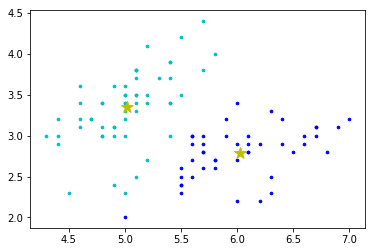

In [7]:
# Plot the results
def plot_clusters(X, clusters, centroids):
    """
      X : 100x2 data matrix
      clusters: 100x1 vector indicating the cluster assignment of each data point
      centroids: 2x2 matrix, the row contains the coordinate of the centroid 
    """
    colors = ['m', 'c', 'b', 'y', 'r', 'g']
    k,_ = np.shape(C)

    fig, ax = plt.subplots()
    for i in range(k):
        print(colors[i])
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        #ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(C[:,0], C[:,1], marker='*', s=150, c='y')
    
plot_clusters(X, clusters, C)